In [59]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import storage
from binary_file_parser import unpack_drawings

# Classifications
Parse categories.txt to get the labels for the quickdraw dataset

In [49]:
def get_categories(filename):
    """Parse categories into a list from filename"""
    print(f"[parsing {filename} to get categories]")
    
    with open(filename, "r", encoding="utf-8") as file:
        # each line is a category
        categories = [line.strip() for line in file]
    
    return categories

In [51]:
categories = get_categories("categories.txt")
categories

[parsing categories.txt to get categories]


['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cello',
 'cell phone',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

# Download + Parse Quickdraw Dataset
Download .bin or .npy file for each category -> parse into numpy array -> wrap in pytorch dataset

In [8]:
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    """Downloads a public blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

In [57]:
download_public_file("quickdraw_dataset", "full/numpy_bitmap/airplane.npy", "data/airplane.npy")

Downloaded public blob full/numpy_bitmap/airplane.npy from bucket quickdraw_dataset to data/airplane.npy.


In [55]:
for drawing in unpack_drawings("data/airplane.bin"):
#     print(drawing)
    print(drawing["image"])
    break

[((167, 109, 80, 69, 58, 31, 57, 117, 99, 52, 30, 6, 1, 2, 66, 98, 253, 254, 246, 182, 165), (140, 194, 227, 232, 229, 229, 206, 124, 123, 149, 157, 159, 153, 110, 82, 77, 74, 109, 121, 127, 120)), ((207, 207, 210, 221, 238), (74, 103, 114, 128, 135)), ((119, 107, 76, 70, 49, 39, 60, 93), (72, 41, 3, 0, 1, 5, 38, 70))]


In [64]:
a = np.load("data/airplane.npy")
a[0].reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,  59,  92, 101,  36,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 174, 255, 255, 255, 245,  53,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 131, 255,  89,  30, 216, 228,  25,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   7, 214, 216,   8,  38, 239, 199,   7,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

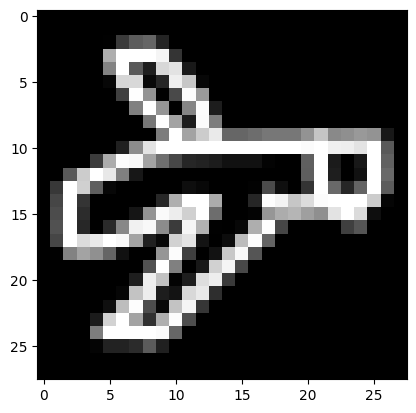

In [66]:
plt.imshow(a[0].reshape(28, 28), cmap="gray")